In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Reading csv file
df = pd.read_csv("Resources/crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#Checking number of rows and columns before the preprocessing
df.shape

(1252, 7)

<h1>Data Preparation</h1>

In [4]:
#Selecting only trading cryptocurrencies
trading = df.loc[df['IsTrading'] == True]
#Dropping IsTrading column
trading = trading.drop(columns='IsTrading')
trading.shape

(1144, 6)

In [6]:
#Removing all rows that have at least one null value
trading = trading.dropna()
trading.shape

(685, 6)

In [7]:
#Filtering for cryptocurrencies that have been mined
mined = trading.loc[df['TotalCoinsMined'] > 0]
mined.shape

(532, 6)

In [8]:
#deleting the CoinName and Unamed: 0 columnds from the original dataframe.
new_crypto_df = mined.drop(columns=['CoinName', 'Unnamed: 0'])
new_crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [9]:
#Checking the numner of rows and columns after data cleaning
new_crypto_df.shape

(532, 4)

In [10]:
#Checking that each column holds a correct data type
new_crypto_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [11]:
#Changing TotalCoinSupply columns type into float
new_crypto_df.TotalCoinSupply = new_crypto_df.TotalCoinSupply.astype(float)

<h3>One-Hot-Encoding</h3>

In [12]:
#Converting categorical data into numerical data
df_numerical = pd.get_dummies(new_crypto_df, drop_first=True)
df_numerical.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Checking how one hot encoding affected the number of columns
df_numerical.shape
#new_crypto_df['Algorithm'].nunique()
#new_crypto_df['ProofType'].nunique()

(532, 96)

<p>Number of columns increased by 92. 2 initally numerical columns (TotalCoinsMined and TotalCoinSupply) remained the same. For the categorical data, new columns have been created. 70 columns for the Algoritm and 24 for Prooftype.</p>

<h3>Standard Scaler</h3>

In [14]:
#Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

<h1>Dimensionality Reduction</h1>

<h3>PCA Model</h3>

In [15]:
#Initialising PCA model
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(scaled_data)

In [16]:
#Transforming PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca
)
df_crypto_pca.shape

(532, 74)

<p>The PCA Model succesfully transformed our large set of variables into a smaller one while still preserving 90% of the explained variance. The number of columns reduced from 96 to 74<p>

<h3>t-SNE Model</h3>

In [17]:
#Initialising t-SNE model
tsne = TSNE(learning_rate=50)

In [18]:
tsne_features = tsne.fit_transform(df_crypto_pca)

In [19]:
tsne_features.shape

(532, 2)

In [20]:
# Preparing to plot the dataset

# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

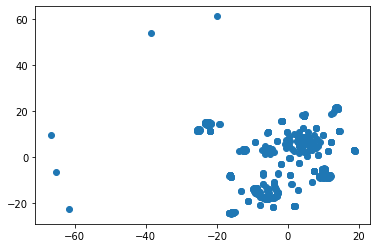

In [22]:
#Visualising the clusters
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

<h1>Running K-Means</h1>

C:\Users\domin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


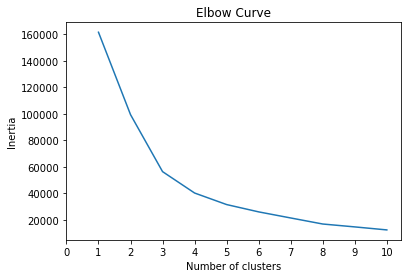

In [23]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
df_tsne = pd.DataFrame(
    data=tsne_features
)
df_tsne.head()

,0,1
0,-9.617999,-13.341435
1,-2.879190,-15.446612
2,-14.842136,-24.075947
3,-22.366123,14.121619
4,14.392459,11.248315


In [25]:
#Predicting clusters with k=4
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_tsne)
# Predict clusters
predictions = model.predict(df_tsne)
df_tsne["class"] = model.labels_
df_tsne.head()

,0,1,class
0,-9.617999,-13.341435,2
1,-2.879190,-15.446612,2
2,-14.842136,-24.075947,2
3,-22.366123,14.121619,0
4,14.392459,11.248315,3


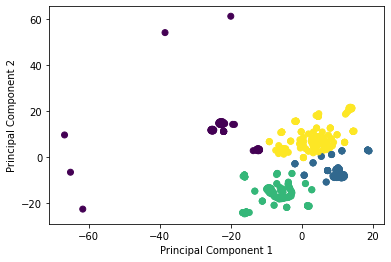

In [26]:
plt.scatter(df_tsne[0], df_tsne[1], c=df_tsne['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<h1>Conclusion</h1>

<p>Initial dataset contained 1252 cryptocurrencies. Out of those 532 met all the criteria and were analysed further. The elbow curve, where x axis represents the k number of clusters between 1 through 10 and y axis is an interia - objective function, allowed to identify the desired number of clusters as 4. K-Means Model has been run with the k=4 and the predicted clusters have been visually presented above.</p>